In [10]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans

In [11]:
# Set input variables
args = WorkflowInputs(images=[r"C:\Cantonese\real\side01.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 2

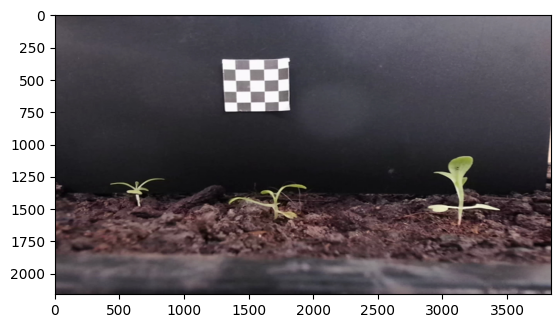

In [12]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

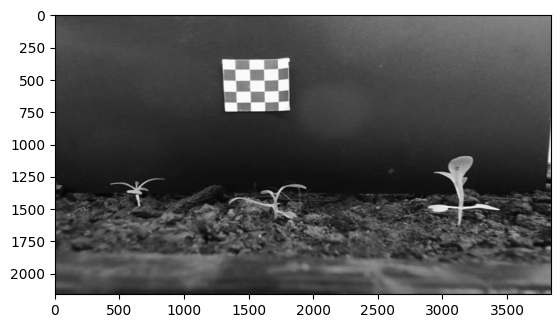

In [63]:
gray_img = pcv.rgb2gray(rgb_img=img)

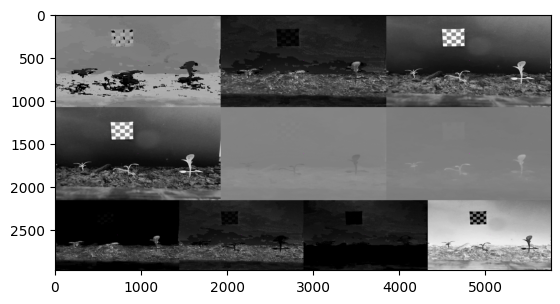

In [13]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

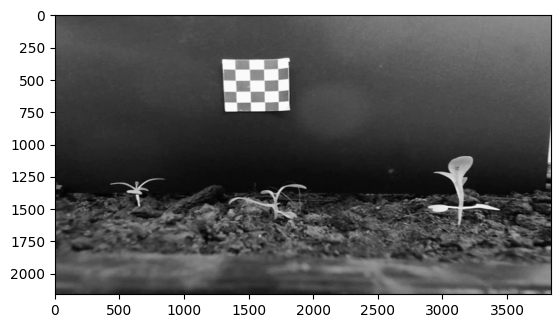

In [64]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='l')

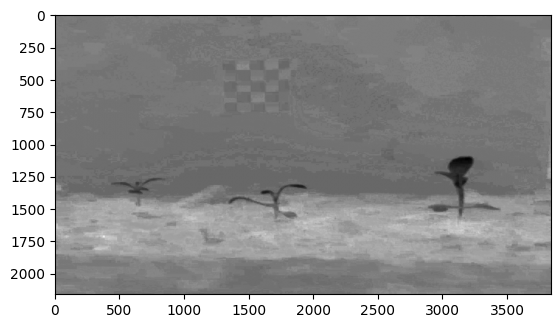

In [47]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

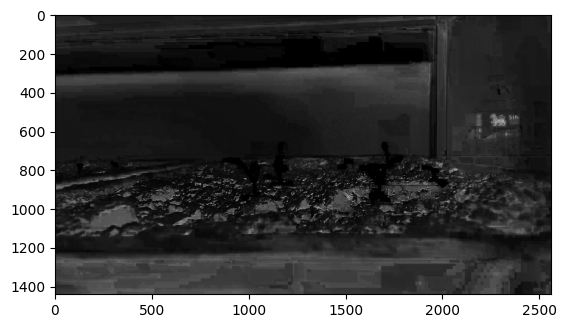

In [8]:
y = pcv.rgb2gray_cmyk(rgb_img=img, channel='m')

In [84]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

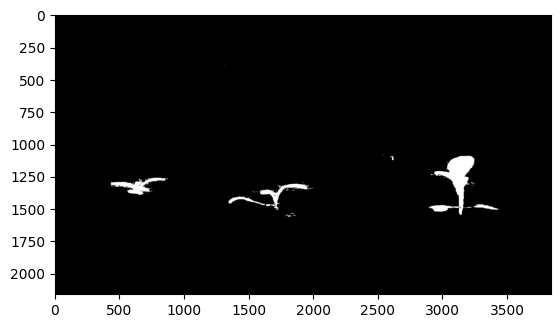

In [111]:
thresh = pcv.threshold.binary(gray_img=a, threshold=126, object_type='dark')

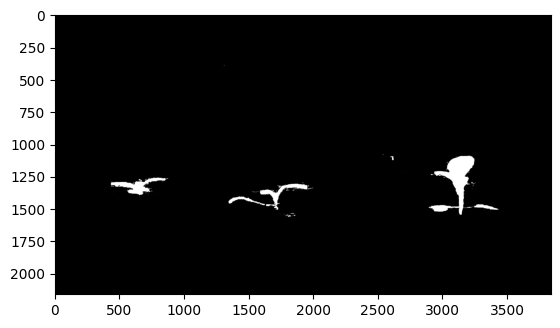

In [112]:
fill_image = pcv.fill_holes(bin_img=thresh)


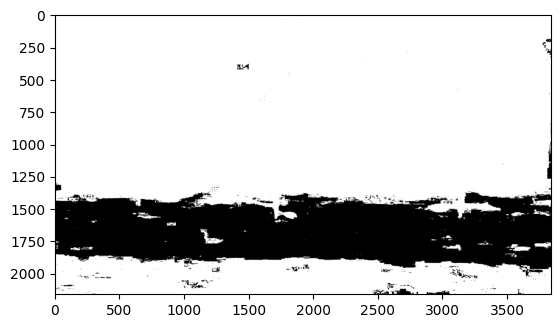

In [50]:
thresh_otsu = pcv.threshold.otsu(gray_img=a,
                                 object_type='dark')

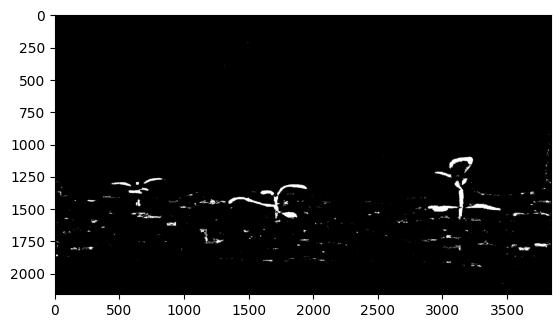

In [51]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=91, offset=4,
                                    object_type='dark')

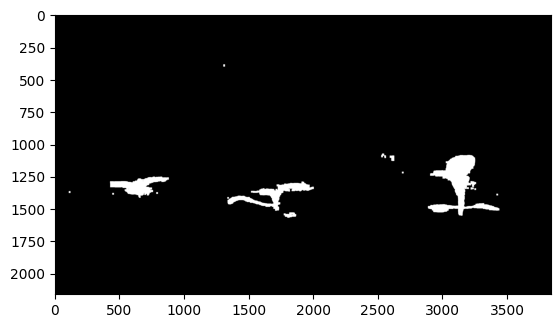

In [113]:
dilate_img = pcv.dilate(gray_img=thresh, ksize=5, i=3)

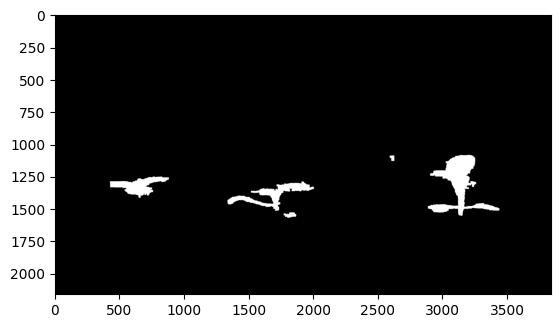

In [114]:
a_fill = pcv.fill(bin_img=dilate_img, size=1000)

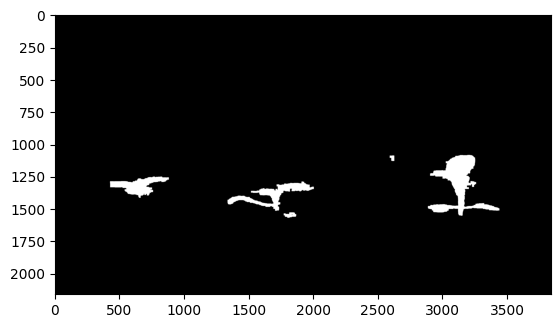

In [115]:
filtered_img = pcv.closing(gray_img=a_fill, kernel=np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))

There were 3 objects not annotated.


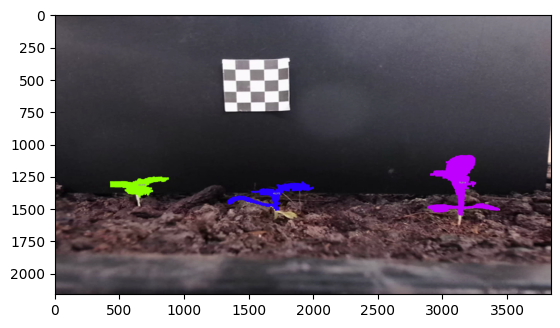

In [116]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=filtered_img, num_objects=3)

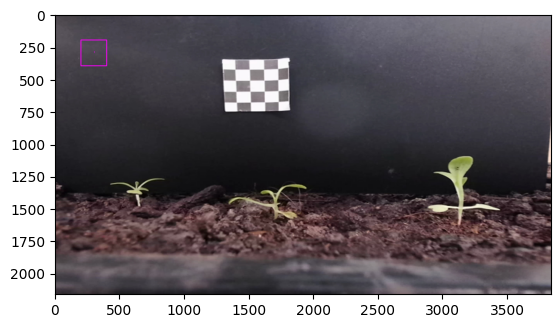

In [61]:
roi = pcv.roi.rectangle(img=img, x=200, y=200, h=200, w=200)

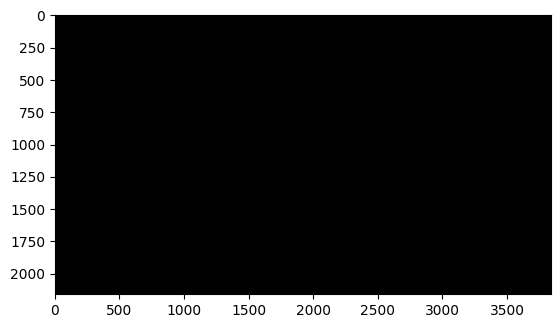

In [62]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=roi, roi_type='partial')